In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzEx'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
#| label: setup

# Data Handling and Manipulation
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture

# Machine Learning Models
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default style for visualization
sns.set_theme(style = "white", palette = "colorblind")

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

In [3]:
mlb_players_18 = pd.read_csv("data/mlb_players_18.csv", encoding = 'iso-8859-1')

mlb_players_18.head()

,name,team,position,games,AB,R,H,doubles,triples,HR,RBI,walks,strike_outs,stolen_bases,caught_stealing_base,AVG,OBP,SLG,OPS
0,"Allard, K",ATL,P,3,1,1,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2.0
1,"Gibson, K",MIN,P,1,2,2,2,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2.0
2,"Law, D",SF,P,7,1,1,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2.0
3,"Nuno, V",TB,P,1,2,0,2,0,0,0,1,0,0,0,0,1.0,1.0,1.0,2.0
4,"Romero, E",KC,P,4,1,1,1,1,0,0,0,0,0,0,0,1.0,1.0,2.0,3.0


In [4]:
mlb_players_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1270 non-null   object 
 1   team                  1270 non-null   object 
 2   position              1270 non-null   object 
 3   games                 1270 non-null   int64  
 4   AB                    1270 non-null   int64  
 5   R                     1270 non-null   int64  
 6   H                     1270 non-null   int64  
 7   doubles               1270 non-null   int64  
 8   triples               1270 non-null   int64  
 9   HR                    1270 non-null   int64  
 10  RBI                   1270 non-null   int64  
 11  walks                 1270 non-null   int64  
 12  strike_outs           1270 non-null   int64  
 13  stolen_bases          1270 non-null   int64  
 14  caught_stealing_base  1270 non-null   int64  
 15  AVG                  

In [5]:
#| code-fold: true

# Assign data
df = mlb_players_18

# Select categorical columns
categorical_cols = df.columns

# Initialize a dictionary to store results
category_analysis = {}

# Loop through each categorical column
for col in categorical_cols:
    counts = df[col].value_counts()
    proportions = df[col].value_counts(normalize=True)
    unique_levels = df[col].unique()
    
    # Store results in dictionary
    category_analysis[col] = {
        'Unique Levels': unique_levels,
        'Counts': counts,
        'Proportions': proportions
    }

# Print results
for col, data in category_analysis.items():
    print(f"Analysis for {col}:\n")
    print("Unique Levels:", data['Unique Levels'])
    print("\nCounts:\n", data['Counts'])
    print("\nProportions:\n", data['Proportions'])
    print("\n" + "-"*50 + "\n")

Analysis for name:

Unique Levels: [' Allard, K' ' Gibson, K' ' Law, D' ... ' Zamora, D' ' Zastryzny, R'
 ' Ziegler, B']

Counts:
 name
Anderson, T    3
Garcia, J      3
Guerra, J      3
Sanchez, A     3
Santana, D     3
              ..
Taylor, M      1
Bour, J        1
Flowers, T     1
Davidson, M    1
Ziegler, B     1
Name: count, Length: 1224, dtype: int64

Proportions:
 name
Anderson, T    0.002362
Garcia, J      0.002362
Guerra, J      0.002362
Sanchez, A     0.002362
Santana, D     0.002362
                 ...   
Taylor, M      0.000787
Bour, J        0.000787
Flowers, T     0.000787
Davidson, M    0.000787
Ziegler, B     0.000787
Name: proportion, Length: 1224, dtype: float64

--------------------------------------------------

Analysis for team:

Unique Levels: ['ATL' 'MIN' 'SF' 'TB' 'KC' 'CHC' 'MIL' 'PIT' 'SEA' 'NYM' 'CWS' 'COL'
 'LAD' 'BOS' 'MIA' 'NYY' 'TOR' 'WSH' 'LAA' 'OAK' 'TEX' 'HOU' 'CLE' 'CIN'
 'PHI' 'STL' 'DET' 'ARI' 'BAL' 'SD']

Counts:
 team
ATL    53
NYM    51
LAD

In [6]:
mlb_players_18.describe()

,games,AB,R,H,doubles,triples,HR,RBI,walks,strike_outs,stolen_bases,caught_stealing_base,AVG,OBP,SLG,OPS
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,48.171654,130.261417,17.031496,32.297638,6.507087,0.666929,4.397638,16.225197,12.351181,32.446457,1.948031,0.754331,0.140191,0.181824,0.217412,0.399239
std,49.957749,185.855484,26.896304,49.396815,10.487391,1.517461,8.036863,26.085535,20.680606,44.687302,5.018058,1.769933,0.140268,0.165976,0.218611,0.374984
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,23.500000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.166000,0.217500,0.214000,0.436500
75%,79.750000,213.750000,27.000000,50.000000,10.000000,1.000000,5.000000,24.000000,18.000000,54.000000,1.000000,1.000000,0.247000,0.316000,0.395000,0.703000
max,162.000000,664.000000,129.000000,192.000000,51.000000,12.000000,48.000000,130.000000,130.000000,217.000000,45.000000,14.000000,1.000000,1.000000,2.000000,3.000000


In [7]:
# Define the columns based on their type for preprocessing
categorical_features = ['team', 'position']
numerical_features = ['games', 'AB', 'R', 'H', 'doubles', 'triples', 'HR', 'RBI', 'walks', 'strike_outs', 'stolen_bases', 'caught_stealing_base', 'AVG', 'OBP', 'SLG', 'OPS']

In [8]:
# Handling missing values: Impute missing values if any
# For numerical features, replace missing values with the median of the column
# For categorical features, replace missing values with the most frequent value of the column
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

In [9]:
# Apply the transformations to the dataset
mlb_preprocessed = preprocessor.fit_transform(mlb_players_18)

# The result is a NumPy array. To convert it back to a DataFrame:
# Update the method to get_feature_names_out for compatibility with newer versions of scikit-learn
feature_names = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
new_columns = numerical_features + feature_names

mlb_preprocessed_df = pd.DataFrame(mlb_preprocessed, columns = new_columns)
mlb_preprocessed_df.head()

,games,AB,R,H,doubles,triples,HR,RBI,walks,strike_outs,...,position_1B,position_2B,position_3B,position_C,position_CF,position_DH,position_LF,position_P,position_RF,position_SS
0,-0.904553,-0.695768,-0.596283,-0.633846,-0.620712,-0.439676,-0.547399,-0.622245,-0.59747,-0.726364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.944603,-0.690386,-0.559089,-0.613594,-0.620712,-0.439676,-0.547399,-0.622245,-0.59747,-0.726364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.824454,-0.695768,-0.596283,-0.633846,-0.620712,-0.439676,-0.547399,-0.622245,-0.59747,-0.726364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.944603,-0.690386,-0.633478,-0.613594,-0.620712,-0.439676,-0.547399,-0.583894,-0.59747,-0.726364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.884529,-0.695768,-0.596283,-0.633846,-0.525322,-0.439676,-0.547399,-0.622245,-0.59747,-0.726364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


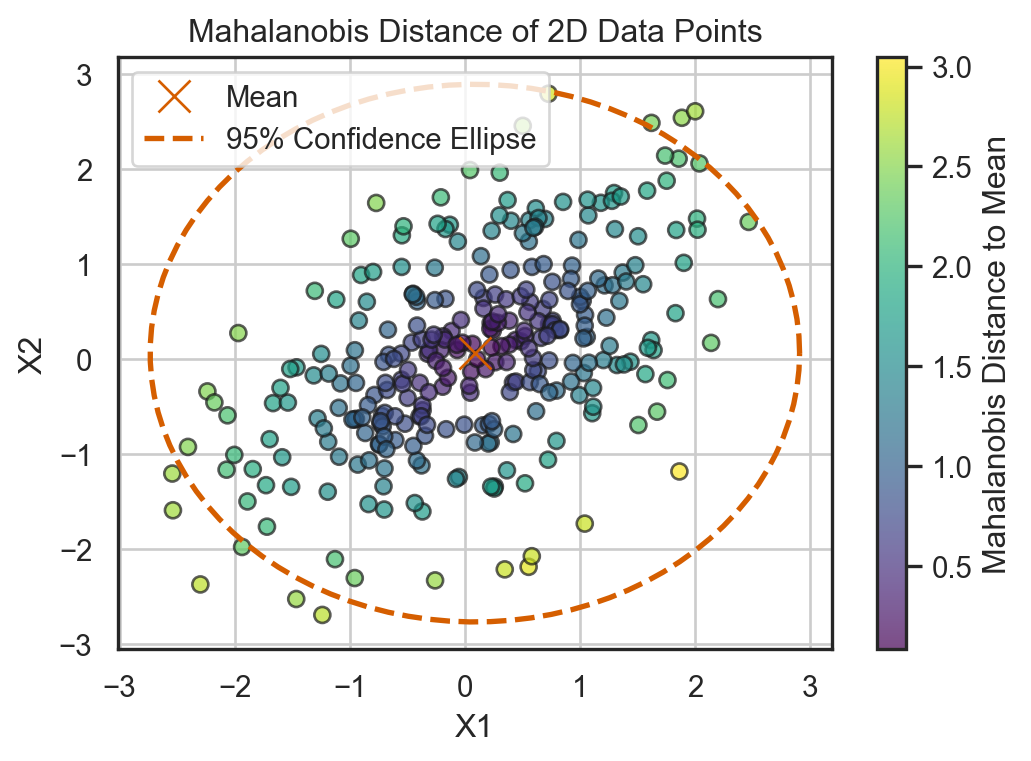

In [10]:
#| echo: false
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# Generating synthetic multivariate data with a covariance
np.random.seed(0)
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # diagonal covariance, indicating variable x and y are correlated
X = np.random.multivariate_normal(mean, cov, 300)

# Mahalanobis Distance calculation
S_inv = np.linalg.inv(np.cov(X.T))  # Inverse covariance matrix
mean_vec = np.mean(X, axis=0)

# Computing Mahalanobis distance for each point in the dataset
mahalanobis_distances = np.array([mahalanobis(x, mean_vec, S_inv) for x in X])

# Plotting
plt.figure(figsize=(6, 4))
sns.set_theme(style = "white", palette = "colorblind")
# Colors based on Mahalanobis distance
colors = mahalanobis_distances

# Scatter plot of the synthetic data
scatter = plt.scatter(X[:, 0], X[:, 1], c=colors, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label='Mahalanobis Distance to Mean')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Mahalanobis Distance of 2D Data Points')
plt.grid(True)

# Highlighting the mean
plt.plot(mean_vec[0], mean_vec[1], 'rx', label='Mean', markersize=12)

# 95% confidence ellipse based on chi-square distribution
theta = np.linspace(0, 2*np.pi, 100)
ellipse_radius = np.sqrt(chi2.ppf(0.95, df=2))  # 95% quantile of the Chi-square distribution
ellipse = [np.sqrt(S_inv[i, i]) * ellipse_radius for i in range(2)]

plt.plot(mean_vec[0] + ellipse[0] * np.cos(theta), mean_vec[1] + ellipse[1] * np.sin(theta), 'r--', linewidth=2, label='95% Confidence Ellipse')

plt.legend()
plt.show()

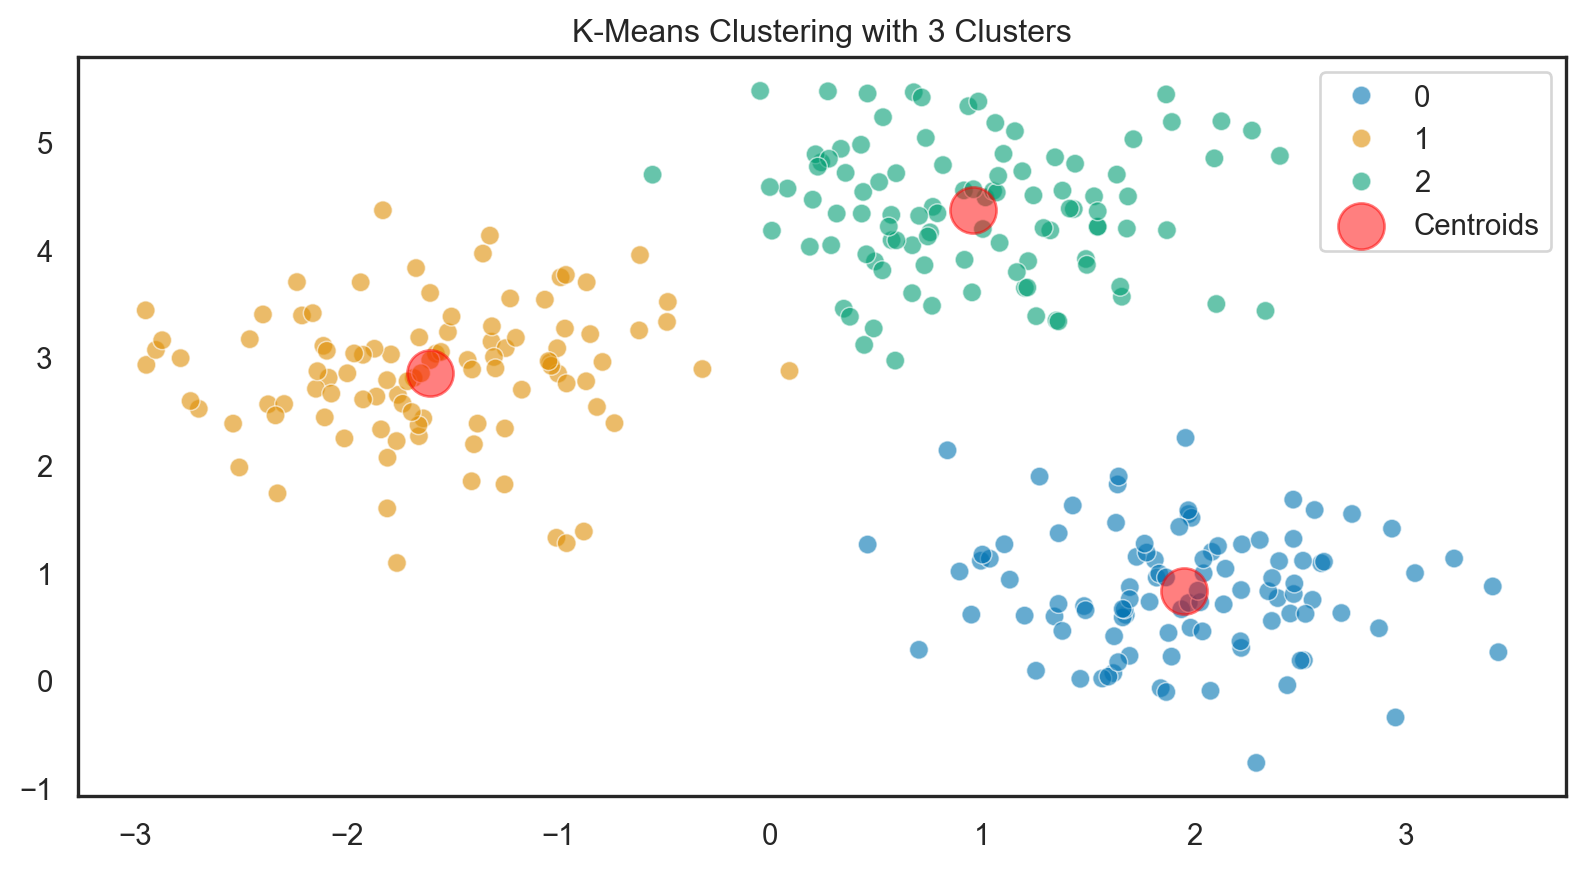

In [11]:
#| echo: false
from sklearn.datasets import make_blobs
sns.set_theme(style = "white", palette = "colorblind")

# Generating simulated data with 3 clusters
X, _ = make_blobs(n_samples = 300, centers = 3, cluster_std = 0.60, random_state = 0)

# Applying K-Means clustering
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the clusters and their centroids
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_kmeans, s = 50, alpha = 0.6, palette = "colorblind")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', alpha = 0.5, label = 'Centroids')
plt.title('K-Means Clustering with 3 Clusters')
plt.legend()
plt.show()

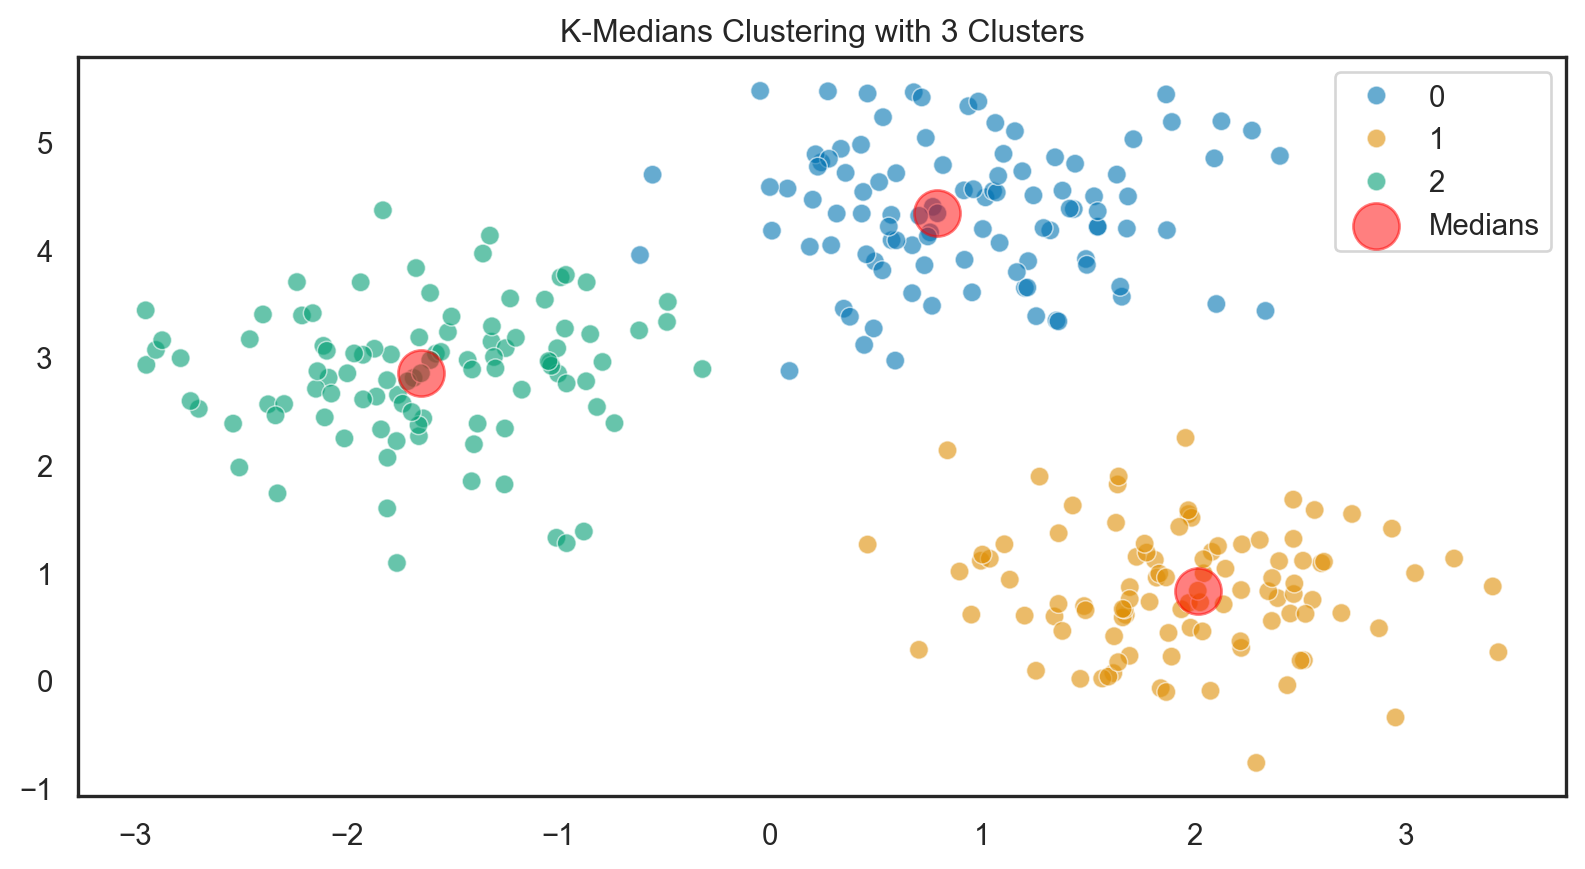

In [12]:
#| echo: false
from sklearn.datasets import make_blobs

sns.set_theme(style="white", palette="colorblind")

# Generating simulated data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Applying K-Medians clustering
kmedians = KMedoids(n_clusters=3, random_state=0)
kmedians.fit(X)
y_kmedians = kmedians.predict(X)

# Plotting the clusters and their medians
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmedians, s=50, alpha=0.6, palette="colorblind")
plt.scatter(kmedians.cluster_centers_[:, 0], kmedians.cluster_centers_[:, 1], s=300, c='red', alpha=0.5, label='Medians')
plt.title('K-Medians Clustering with 3 Clusters')
plt.legend()
plt.show()

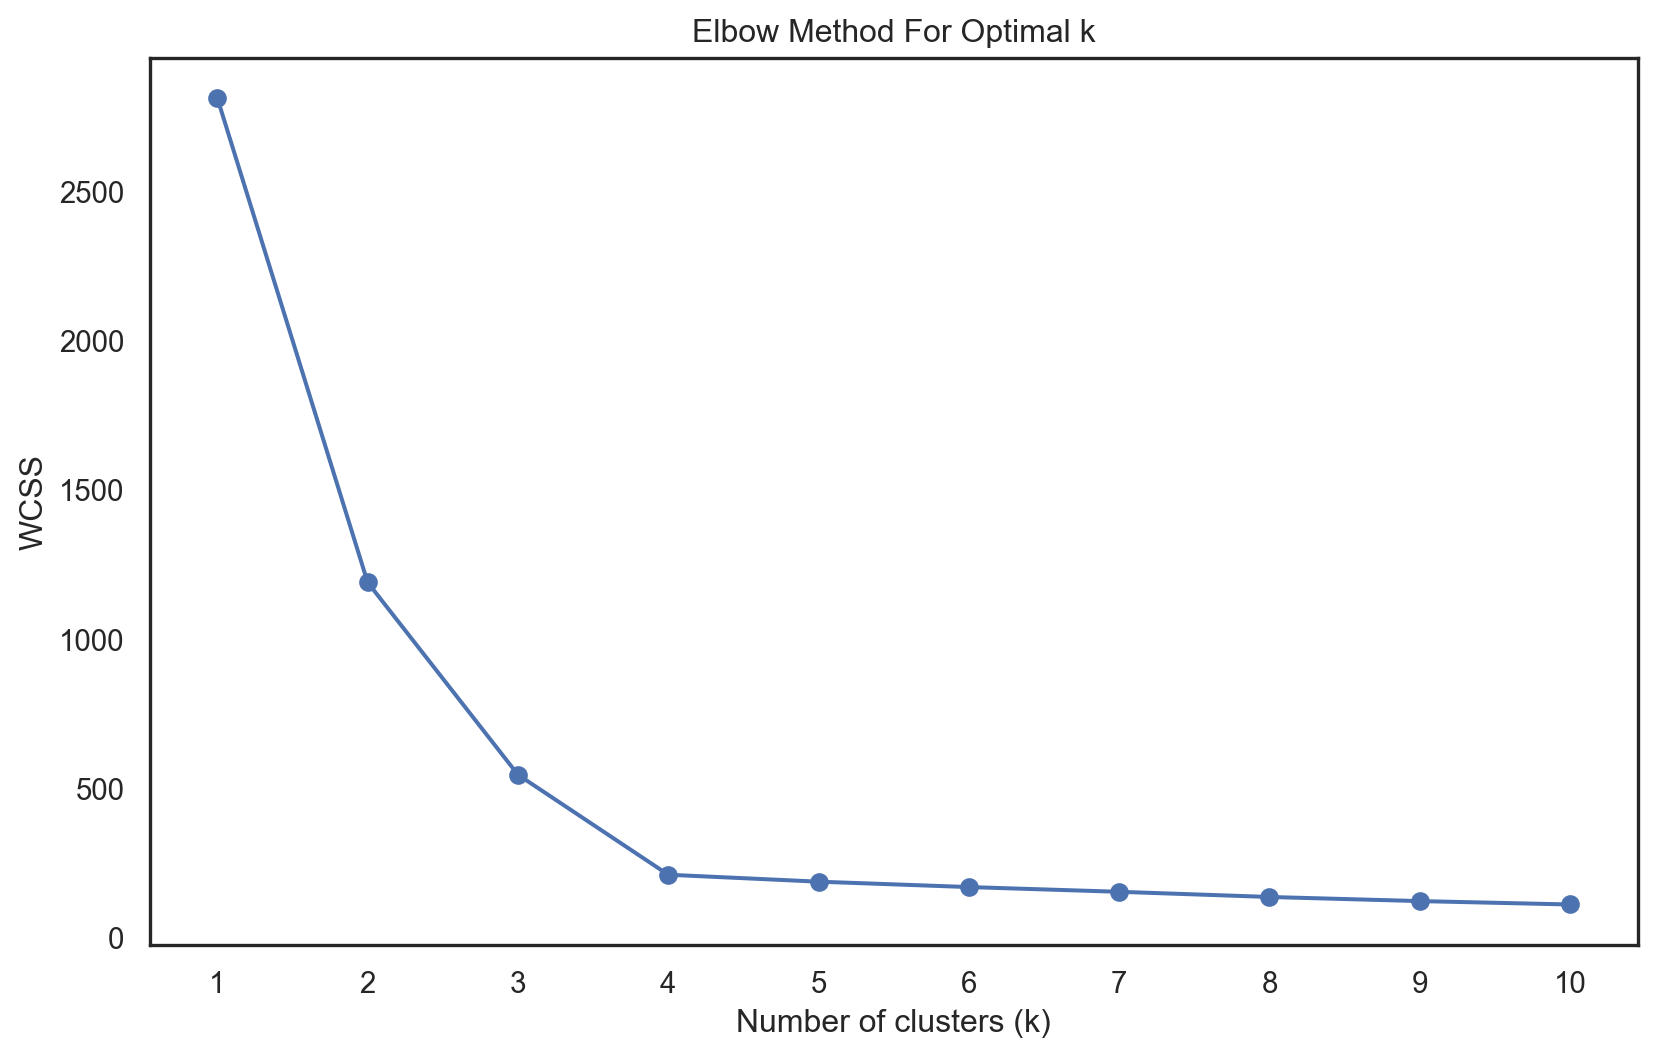

In [13]:
#| echo: false
# Generating synthetic data
X, _ = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

# Calculating WCSS for a range of number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Creating the plot
sns.set(style = "white")
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

For 3 clusters Silhouetter Score: 0.551


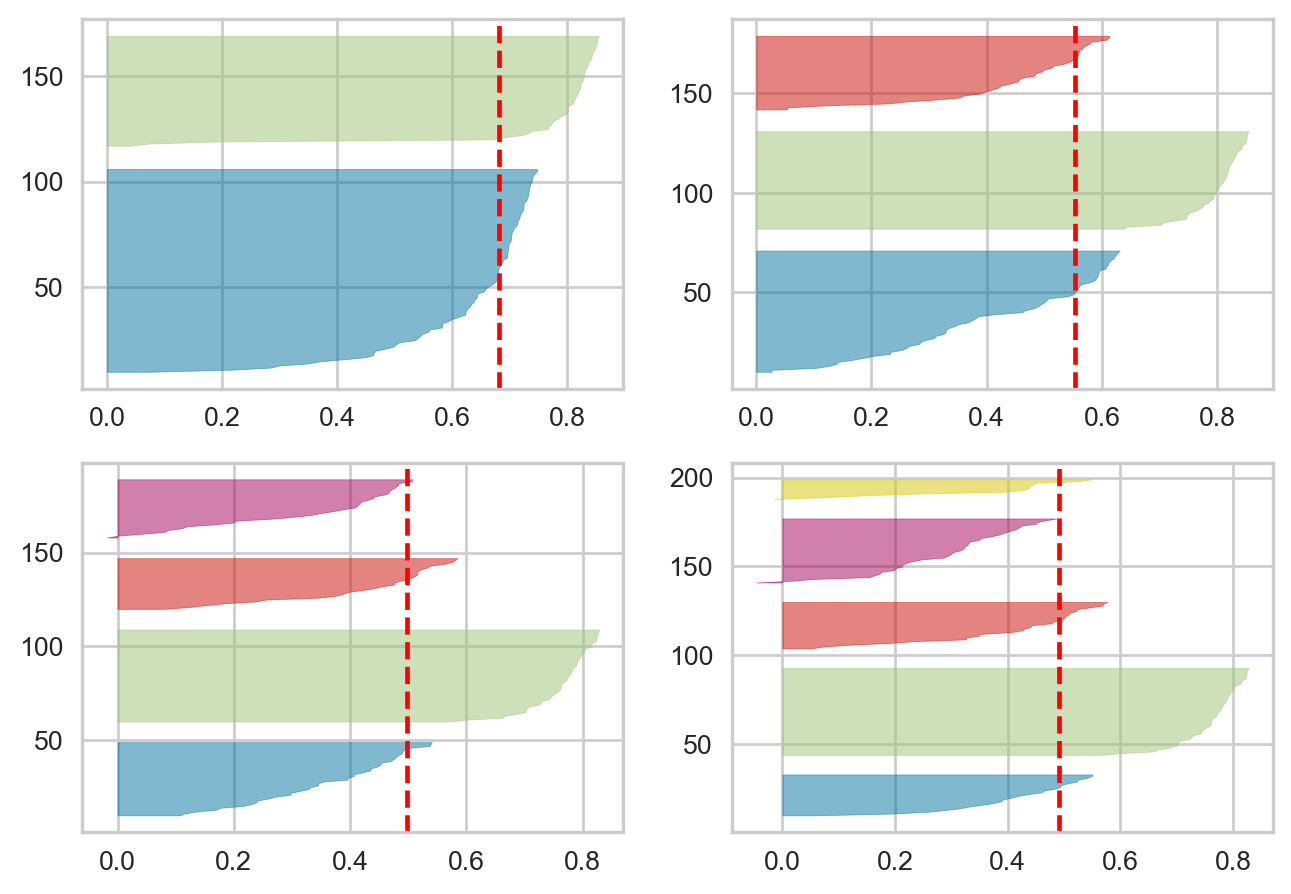

In [14]:
#| echo: false
from sklearn import datasets
from sklearn.cluster import KMeans

# Load IRIS dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target

# Instantiate the KMeans models
km = KMeans(n_clusters = 3, random_state = 42)

# Fit the KMeans model
km.fit_predict(X)

# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print("For 3 clusters", 'Silhouetter Score: %.3f' % score)

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2)
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

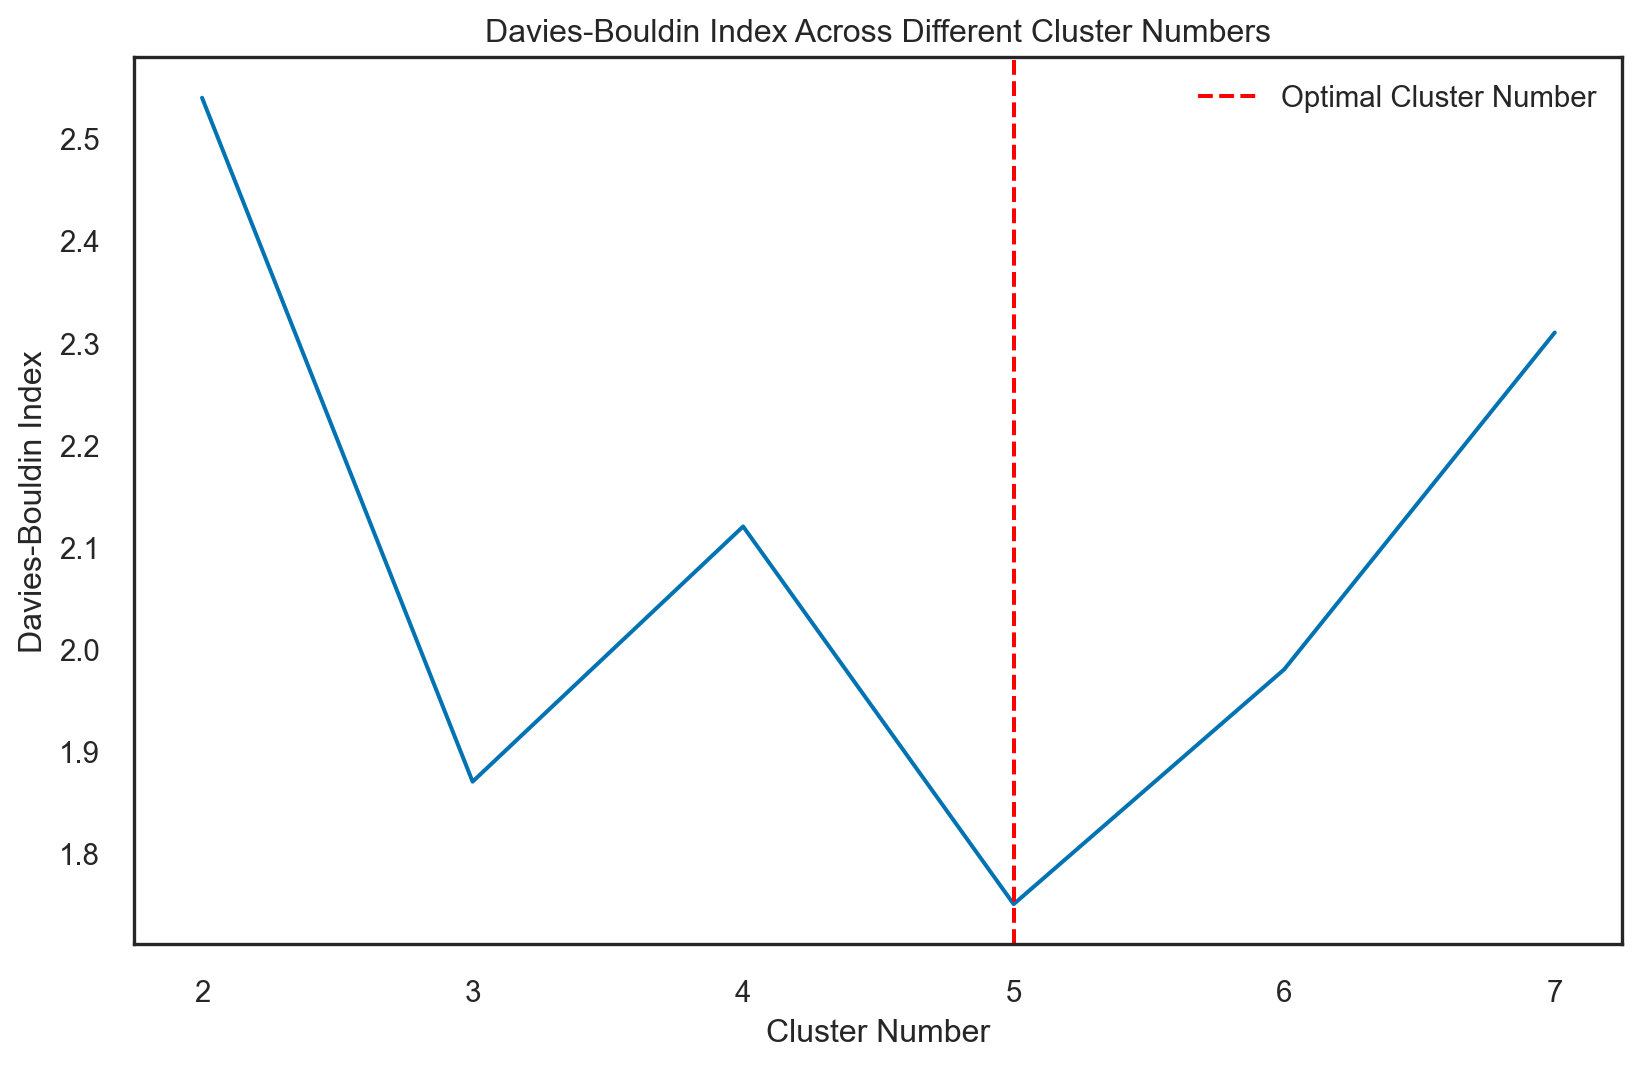

In [15]:
#| echo: false
# Sample data for DBI across different cluster numbers
data = {
    "Cluster Number": [2, 3, 4, 5, 6, 7],
    "Davies-Bouldin Index": [2.54, 1.87, 2.12, 1.75, 1.98, 2.31]
}

df = pd.DataFrame(data)

# Line plot with minimum DBI highlighted
plt.figure(figsize = (10, 6))
sns.set_theme(style = "white", palette = "colorblind")
sns.lineplot(x = "Cluster Number", y = "Davies-Bouldin Index", data = df)
plt.axvline(df[df["Davies-Bouldin Index"] == df["Davies-Bouldin Index"].min()]["Cluster Number"].values[0], linestyle = "--", color = "red", label = "Optimal Cluster Number")
plt.xlabel("Cluster Number")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index Across Different Cluster Numbers")
plt.legend()
plt.show()

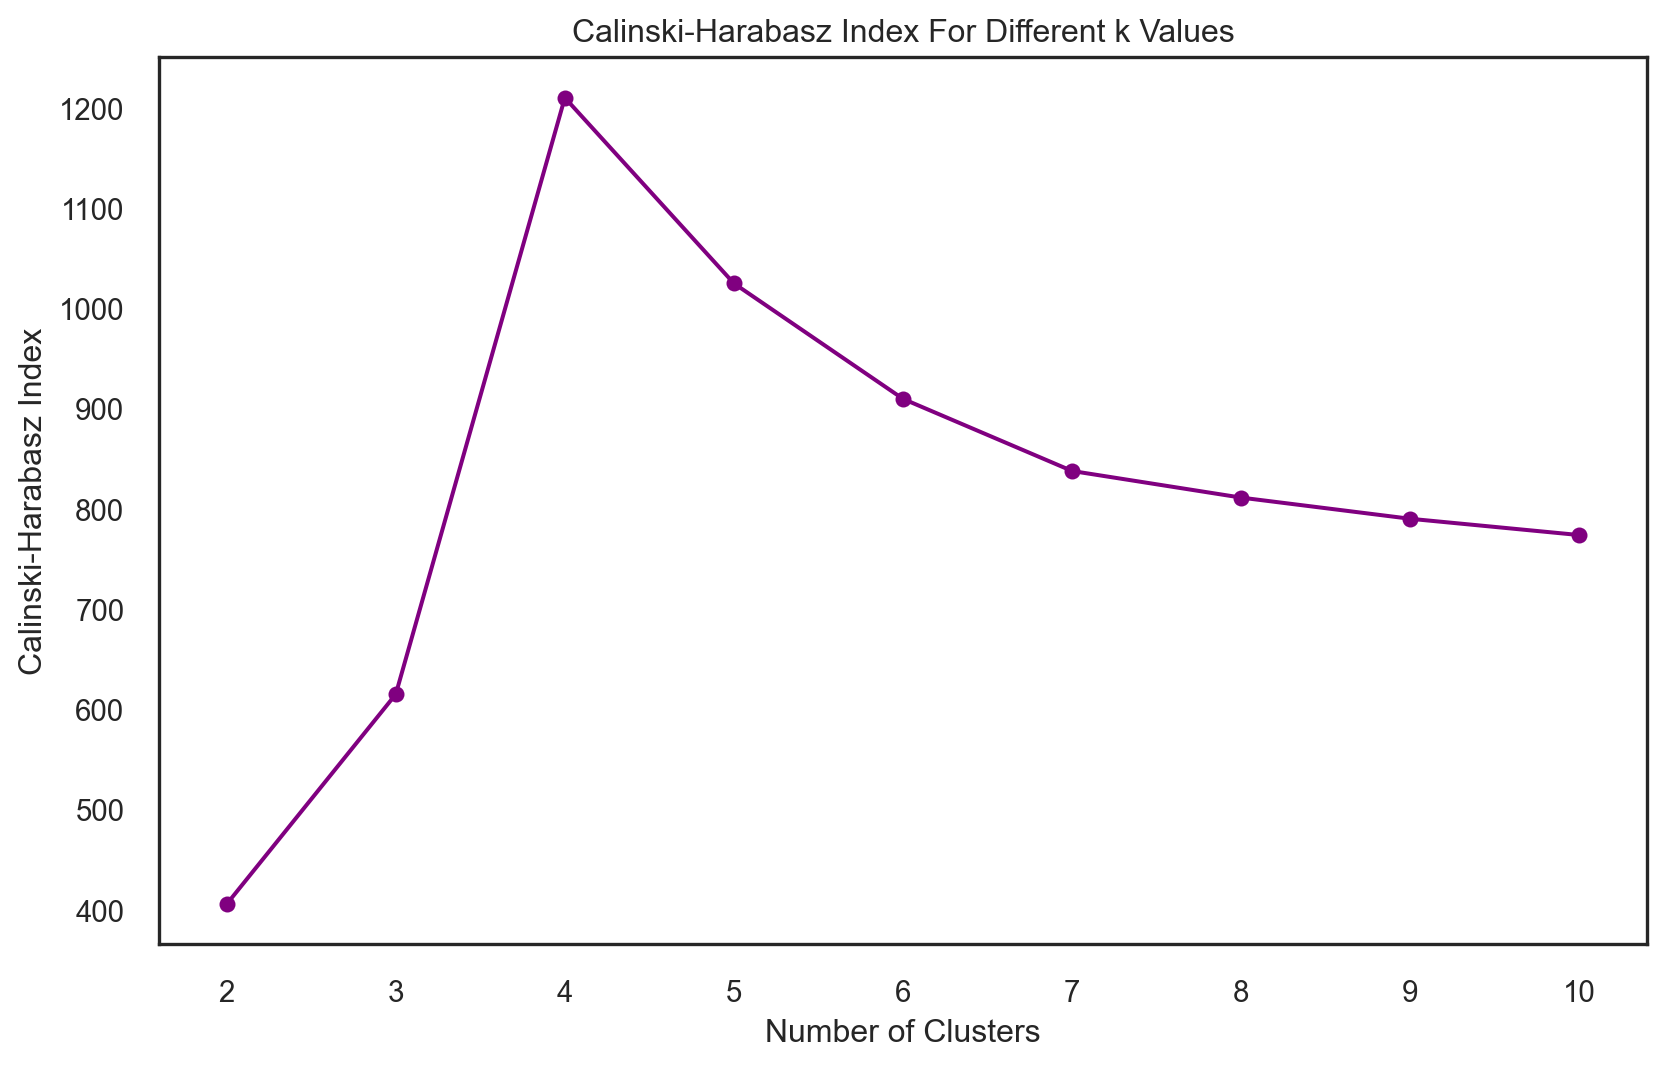

In [16]:
#| echo: false
# Generating synthetic data
X, _ = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

# Calculating Calinski-Harabasz Index for different numbers of clusters
ch_scores = []
for i in range(2, 11):  # CH index is not defined for i=1 (single cluster)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(X, labels)
    ch_scores.append(ch_score)

# Plotting the Calinski-Harabasz Index
sns.set_style("white")
plt.figure(figsize = (10, 6))
plt.plot(range(2, 11), ch_scores, marker = 'o', linestyle = '-', color = 'purple')
plt.title('Calinski-Harabasz Index For Different k Values')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

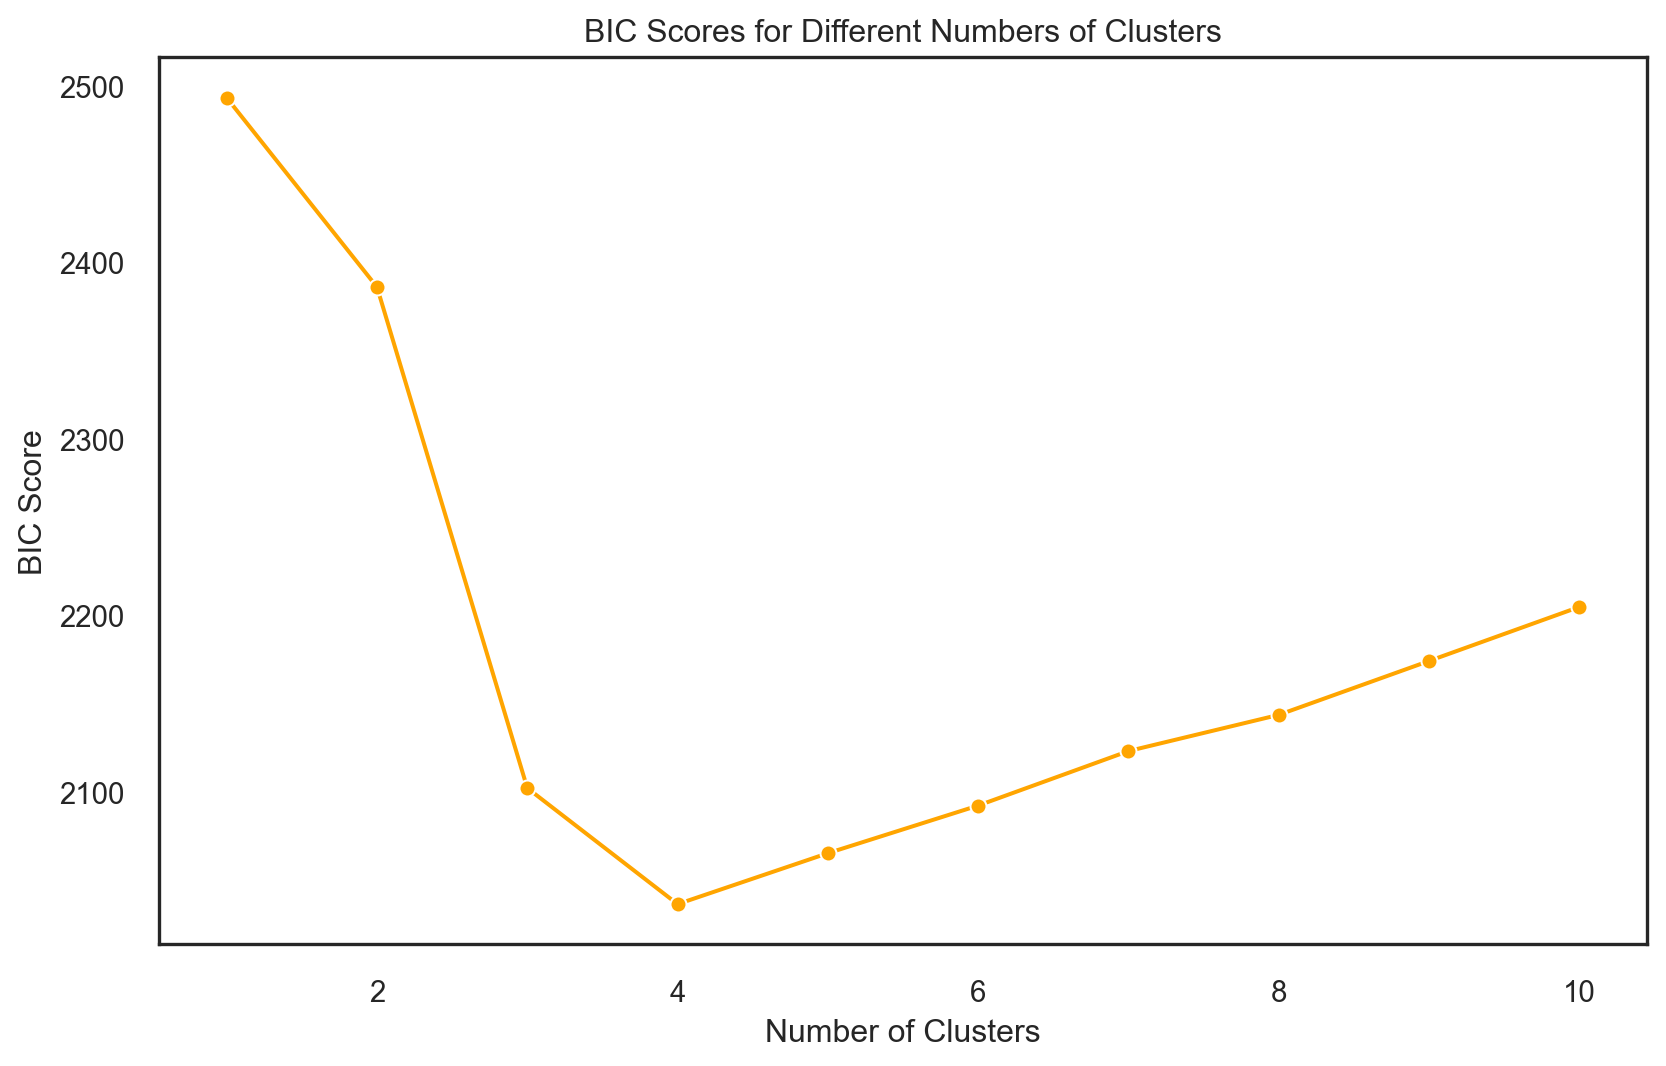

In [17]:
#| echo: false
# Generating synthetic data
X, _ = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

# Calculating BIC for different numbers of clusters using Gaussian Mixture Models
n_components = np.arange(1, 11)
bics = []
for n in n_components:
    gmm = GaussianMixture(n_components = n, random_state = 0)
    gmm.fit(X)
    bics.append(gmm.bic(X))

# Visualizing the BIC scores
sns.set(style = "white")
plt.figure(figsize = (10, 6))
sns.lineplot(x = n_components, y = bics, marker = 'o', linestyle = '-', color = 'orange')  # Adjusted line
plt.title('BIC Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.show()

In [18]:
#| code-fold: true
# K-Means Clustering
kmeans = KMeans(n_clusters = 5, random_state = 0)  # Adjust n_clusters as needed
kmeans.fit(mlb_preprocessed_df)
clusters = kmeans.predict(mlb_preprocessed_df)

# Adding cluster labels to the DataFrame
mlb_preprocessed_df['Cluster'] = clusters

# Evaluate clustering performance
silhouette_avg = silhouette_score(mlb_preprocessed, clusters)
print("For n_clusters =", 5, f"The average silhouette_score is : {silhouette_avg:.3f}")
print("")

# Model Summary
print("Cluster Centers:\n", kmeans.cluster_centers_)

For n_clusters = 5 The average silhouette_score is : 0.283

Cluster Centers:
 [[-5.39609837e-01 -5.02836911e-01 -5.18899682e-01 -5.23917640e-01
  -5.14812799e-01 -3.89394270e-01 -4.95709868e-01 -5.22793433e-01
  -4.78791120e-01 -4.58484221e-01 -3.19933197e-01 -3.76064850e-01
   2.01292991e-01  3.36219513e-01  2.94309908e-02  1.66023612e-01
   2.96610169e-02  3.81355932e-02  5.08474576e-02  2.54237288e-02
   4.23728814e-02  4.66101695e-02  1.27118644e-02  2.54237288e-02
   1.69491525e-02  1.69491525e-02  1.69491525e-02  2.96610169e-02
   3.38983051e-02  2.54237288e-02  6.35593220e-02  3.81355932e-02
   2.11864407e-02  6.35593220e-02  2.11864407e-02  2.96610169e-02
   3.81355932e-02  4.66101695e-02  3.81355932e-02  2.96610169e-02
   2.54237288e-02  5.93220339e-02  2.54237288e-02  3.38983051e-02
   2.54237288e-02  2.96610169e-02  1.69491525e-02  9.32203390e-02
   5.93220339e-02  1.65254237e-01  6.77966102e-02 -7.80625564e-18
   4.23728814e-02  4.19491525e-01  5.93220339e-02  7.62711864e-0

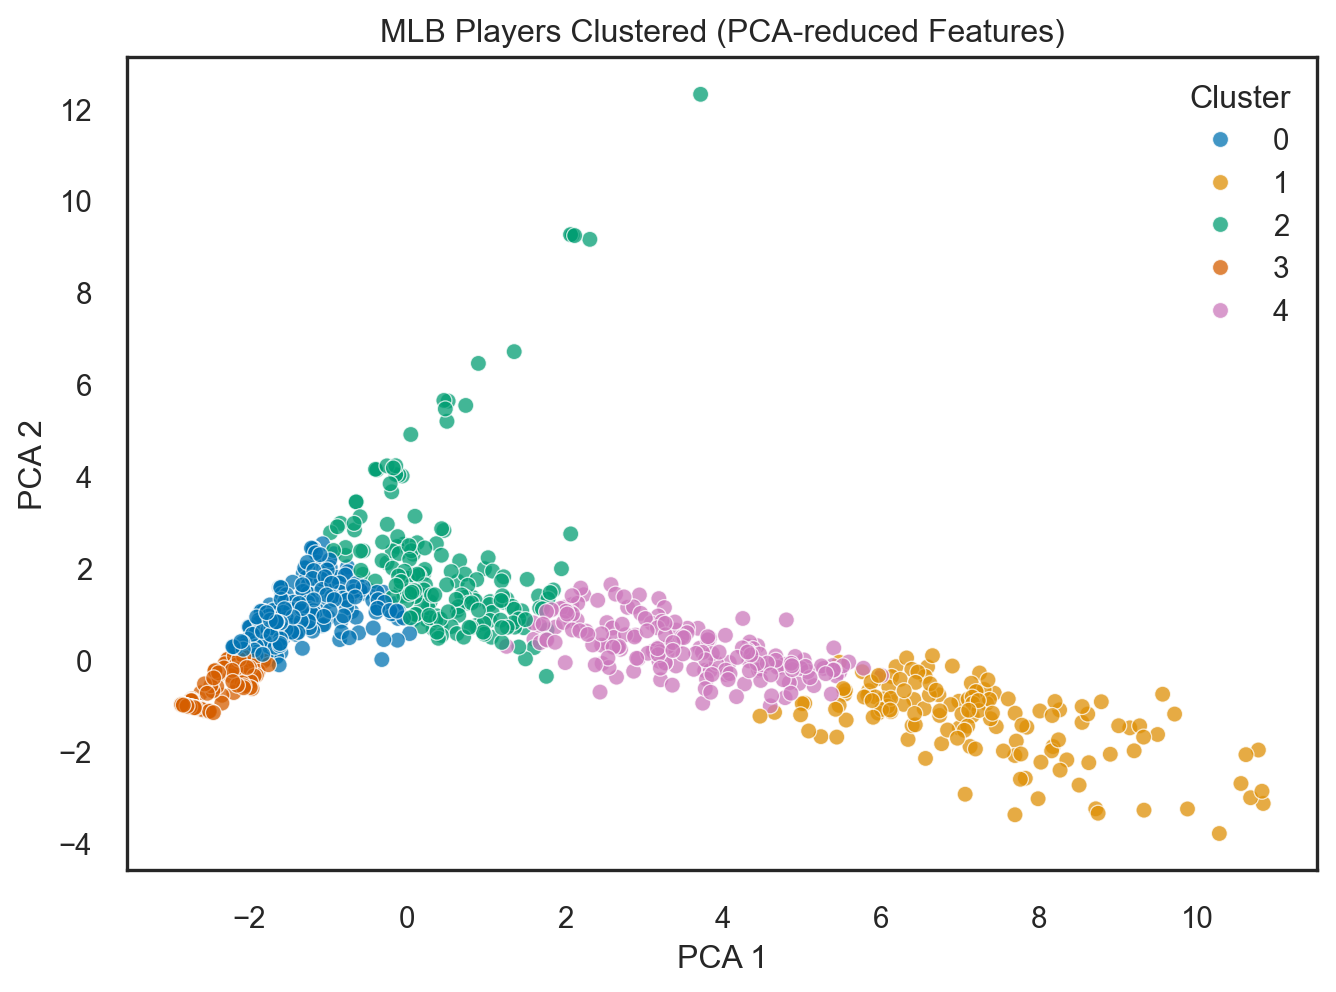

In [19]:
#| code-fold: true
pca = PCA(n_components = 2)
mlb_pca = pca.fit_transform(mlb_preprocessed)
sns.scatterplot(x = mlb_pca[:, 0], y = mlb_pca[:, 1], hue = clusters, alpha = 0.75, palette = "colorblind")
plt.title('MLB Players Clustered (PCA-reduced Features)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title = 'Cluster')
plt.show()

In [20]:
#| code-fold: true
#| eval: false

from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Using 'mlb_preprocessed_df' is your DataFrame after preprocessing
data = mlb_preprocessed_df.to_numpy()

# Create KMedoids instance with 5 clusters and Manhattan distance (L1)
kmedoids_instance = KMedoids(n_clusters = 5, metric = 'manhattan', random_state = 42)

# Fit the model and predict cluster labels
cluster_labels = kmedoids_instance.fit_predict(data)

# Assign cluster labels to each record in DataFrame
mlb_preprocessed_df['Cluster'] = cluster_labels

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(data, cluster_labels)
print(f"For n_clusters = 5, The average silhouette_score is : {silhouette_avg:.3f}")

# Displaying the medians (centroids) of the clusters
# Note: KMedoids uses actual data points as centers, not the mean or median of the cluster.
print("Cluster Medians (Centers):\n", kmedoids_instance.cluster_centers_)

# Visualize using PCA for dimensionality reduction
pca = PCA(n_components = 2)
mlb_pca = pca.fit_transform(data)

# Plotting the clusters
sns.scatterplot(x = mlb_pca[:, 0], y = mlb_pca[:, 1], hue = cluster_labels, alpha = 0.75, palette = "colorblind")
plt.title('MLB Players Clustered (PCA-reduced Features)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title = 'Cluster')
plt.show()